# Import Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Styles
plt.style.use('ggplot')
sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['patch.force_edgecolor'] = True

In [91]:
# Dataset can be downloaded from here https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [92]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [93]:
# Text Preprocessing
import nltk

In [94]:
# nltk.download("all")
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

import spacy
nlp = spacy.load("en_core_web_sm")

In [95]:
messages = pd.read_csv("/content/sample_data/spam.csv", encoding = 'latin-1')

# New Section

In [96]:
# Reading the data
df = pd.read_csv("/content/sample_data/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [97]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'Target','v2':'Text'})
df['Target_enc'] = df['Target'].map({'ham':0,'spam':1})
df.head()

,Target,Text,Target_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [98]:
df.sample(5)

,Target,Text,Target_enc
4053,ham,dont make ne plans for nxt wknd coz she wants ...,0
1979,ham,Shhhhh nobody is supposed to know!,0
4075,spam,87077: Kick off a new season with 2wks FREE go...,1
670,ham,Ho ho - big belly laugh! See ya tomo,0
5066,spam,83039 62735=å£450 UK Break AccommodationVouche...,1


In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [100]:
df['Target'] = encoder.fit_transform(df['Target'])

In [101]:
df.head()

,Target,Text,Target_enc
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [102]:
# missing values
df.isnull().sum()

Target        0
Text          0
Target_enc    0
dtype: int64

In [103]:
# check for duplicate values
df.duplicated().sum()

403

In [104]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [105]:
df.duplicated().sum()

0

In [106]:
df.shape

(5169, 3)

# 2. Exploratory Data analysis

In [107]:
df.head()

,Target,Text,Target_enc
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [108]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

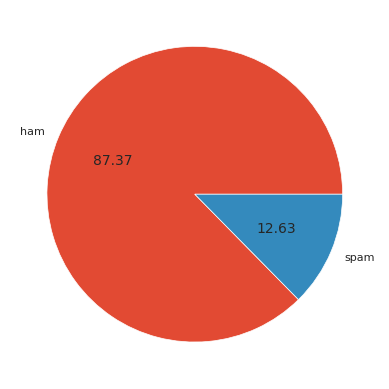

In [109]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [110]:
# Data is imbalanced

In [111]:
import nltk

In [112]:
!pip install nltk

In [113]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
df['num_characters'] = df['Text'].apply(len)

In [115]:
df.head()

,Target,Text,Target_enc,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",0,111
1,0,Ok lar... Joking wif u oni...,0,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,0,U dun say so early hor... U c already then say...,0,49
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61


In [116]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [117]:
df.head()

,Target,Text,Target_enc,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,0,Ok lar... Joking wif u oni...,0,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,0,U dun say so early hor... U c already then say...,0,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [118]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [119]:
df.head()

,Target,Text,Target_enc,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [120]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [121]:
#ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [122]:
#spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [123]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

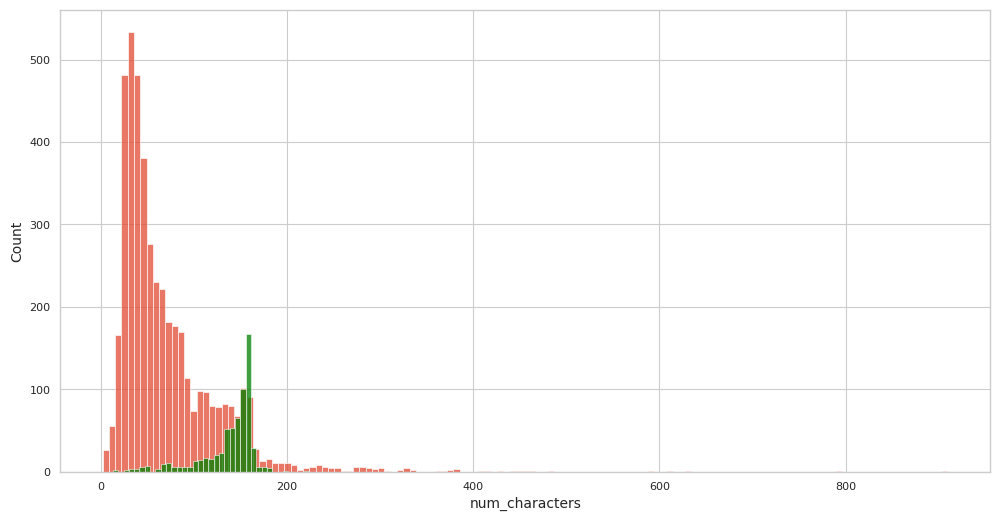

In [124]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

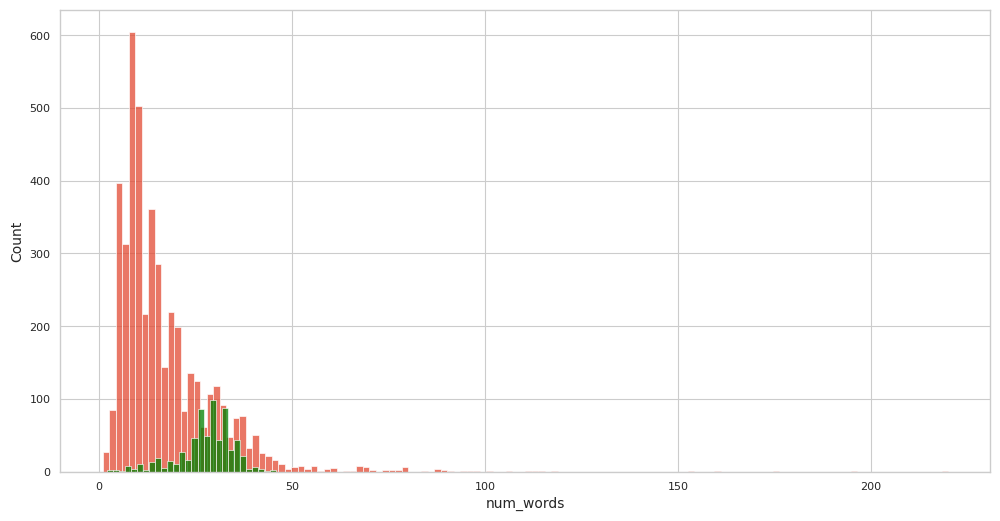

In [125]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='green')

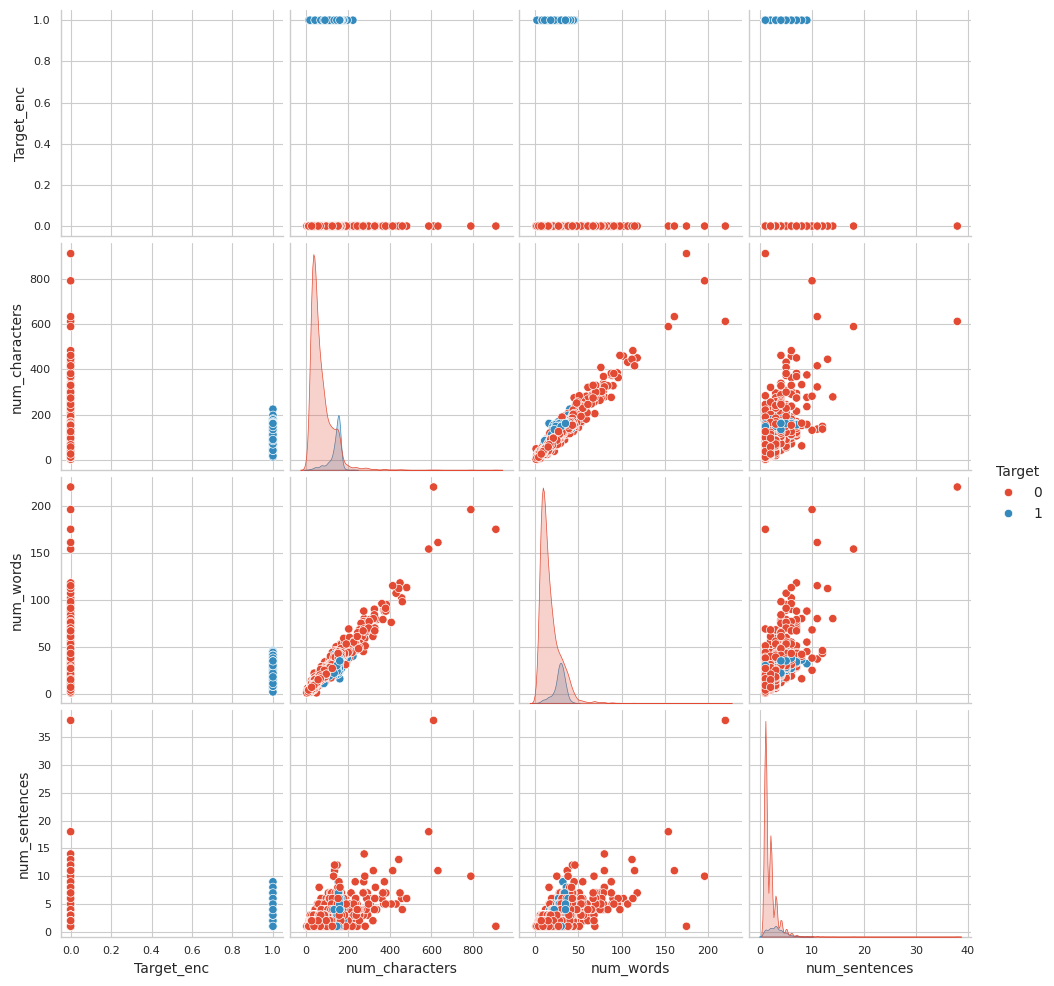

In [126]:
sns.pairplot(df, hue= 'Target')

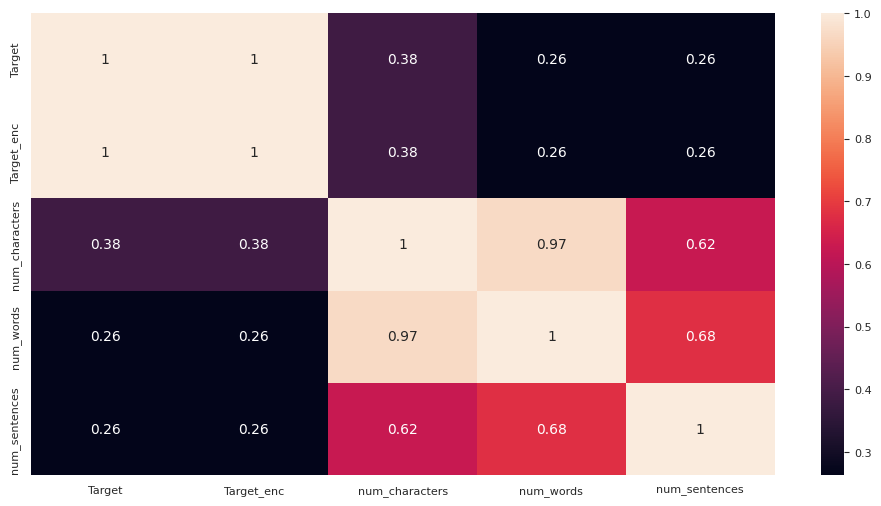

In [127]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
plt.figure(figsize=(12,6))
new_var = sns.heatmap(numeric_df.corr(), annot=True)

# 3. Data Preprocessing

#1. Lower Case
#2. Tokenization
#3. Removing Special Characters
#4. Removing stop words and puntuation
#5. Stemming

**CASE 1:** Lower Case

In [134]:
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
      if i.isalnum():
          y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

  text = y[:]
  y.clear()
  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [137]:
transform_text('I loved the CN shows on Learning about Ben 10. How About You?')

'love cn show learn ben'

In [188]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [138]:
transform_text('Hi how Are you Rohit?')

'hi rohit'

In [139]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [140]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [141]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [142]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [143]:
df.head()

,Target,Text,Target_enc,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [144]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [145]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

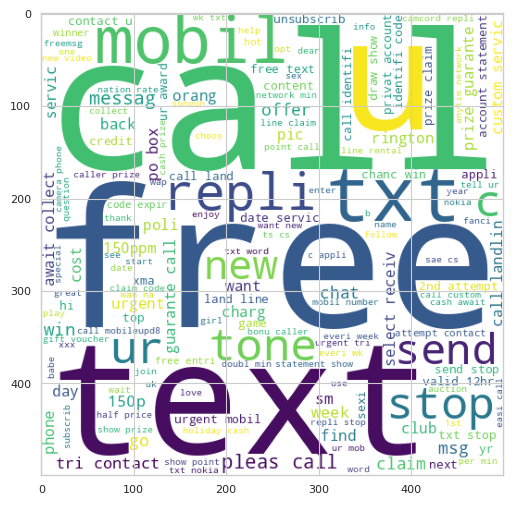

In [146]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [147]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

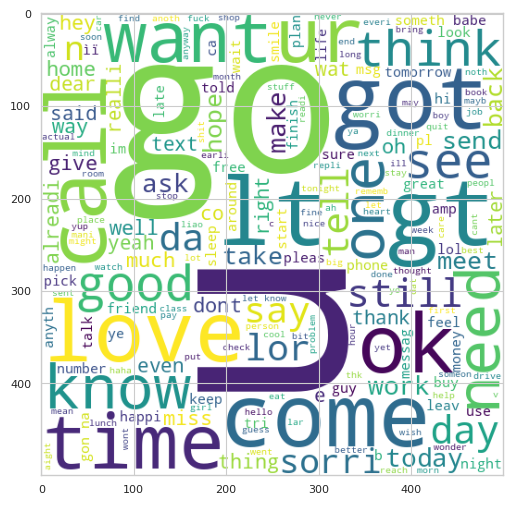

In [148]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [149]:
df.head()

,Target,Text,Target_enc,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [150]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [151]:
len(spam_corpus)

9939

In [152]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [153]:
len(ham_corpus)

35404

In [154]:
# Text Vectorization
# Using Bag of Words
df.head()

,Target,Text,Target_enc,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


# 4. Model Building

In [155]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [156]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [158]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [159]:
X.shape

(5169, 6708)

In [160]:
Y = df['Target'].values

In [161]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [164]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [165]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [166]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8781431334622823
[[791 105]
 [ 21 117]]
0.527027027027027


In [167]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9729206963249516
[[881  15]
 [ 13 125]]
0.8928571428571429


In [168]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [169]:
# tfidf ---> MNB

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [171]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [172]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [173]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)

    return accuracy,precision

In [187]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9661508704061895, 0.8992248062015504)

In [175]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.8928571428571429
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.971953578336557
Precision -  0.990990990990991
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  Bgc
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [176]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [177]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.971954,0.990991
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,Bgc,0.962282,0.915966
0,SVC,0.966151,0.899225


In [178]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [179]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.971954
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.926499
8,Bgc,Accuracy,0.962282
9,SVC,Accuracy,0.966151


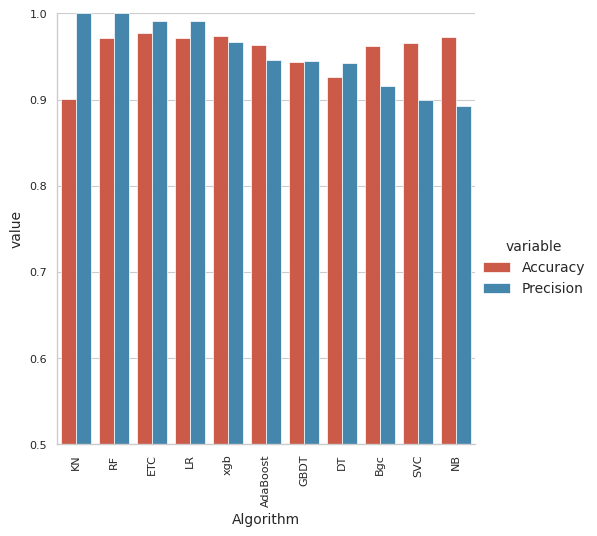

In [180]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable', data = performance_df1, kind='bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improve

1. Change the max_features parameter of TfIdf

In [181]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [182]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [183]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [184]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [185]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.971954,0.990991,0.971954,0.990991,0.971954,0.990991
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DT,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857
8,Bgc,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,SVC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225


In [189]:
import pickle
pickle.dump(tfidf,open('vertorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))